#### PROBLEM STATEMENT 1
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


#### IMPORTING PACKAGES

In [29]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### READING  THE DATA 

In [30]:
forest = pd.read_csv('E:\\deeksha\\python\\data\\forestfires.csv')

#### PERFORMING EDA ON DATA

In [31]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [32]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [33]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [34]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [36]:
forest.shape, forest.size

((517, 31), 16027)

In [37]:
forest['size_category'].count()

517

#### Visulization of data parameters


Bad key mathtext.fallback_to_cm in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key keymap.all_axes in file C:\Users\mohit\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-dat

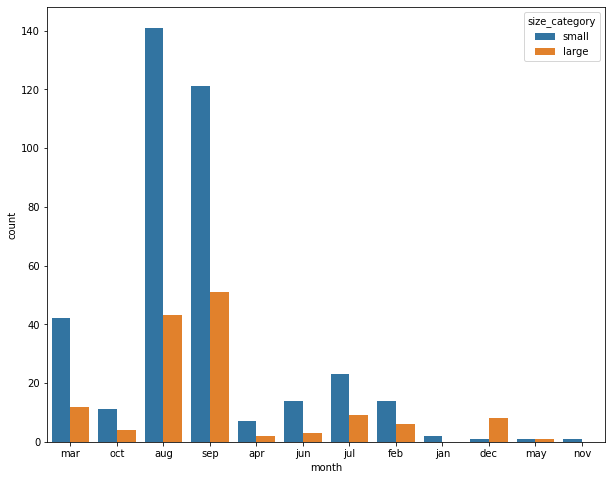

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(x = forest['month'],hue=forest['size_category'])
plt.show()

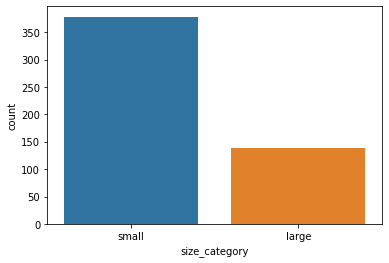

In [39]:
sns.countplot(x= 'size_category' , data=forest)
plt.show()

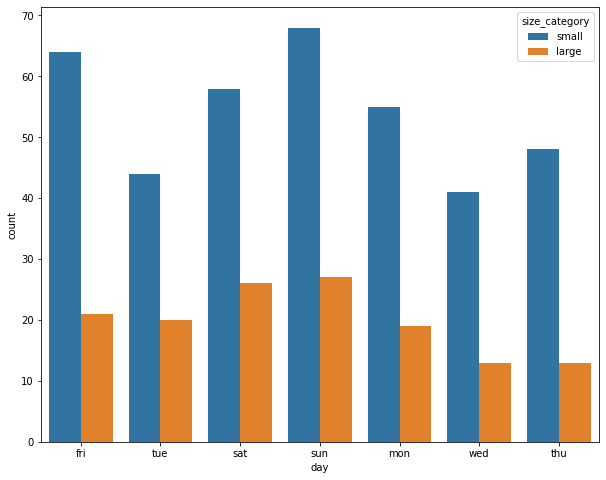

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(x = forest['day'],hue=forest['size_category'])
plt.show()

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

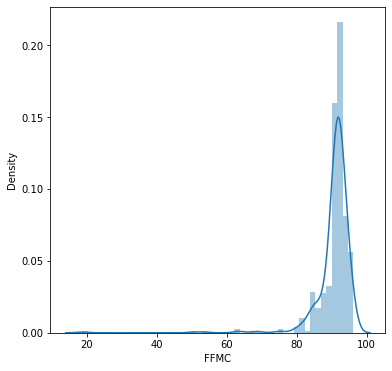

In [41]:
plt.figure(figsize=(6,6))
sns.distplot(forest['FFMC'])

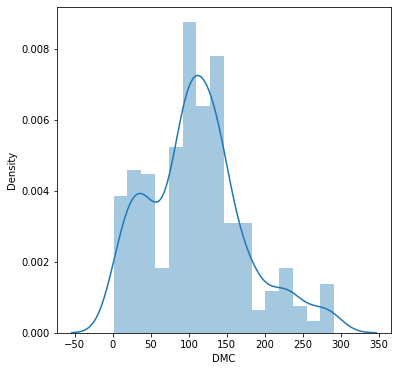

In [42]:
plt.figure(figsize=(6,6))
sns.distplot(forest['DMC'],)
plt.show()

<AxesSubplot:xlabel='DC', ylabel='Density'>

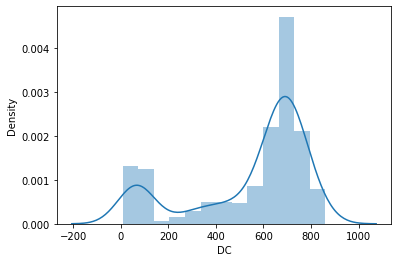

In [43]:
sns.distplot(forest['DC'])

<AxesSubplot:xlabel='ISI', ylabel='Density'>

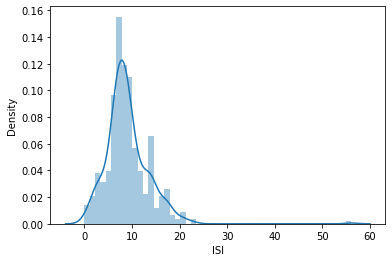

In [44]:
sns.distplot(forest['ISI'])

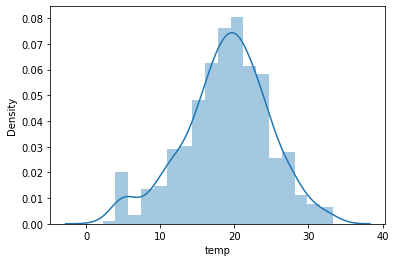

In [45]:
sns.distplot(forest['temp'],)
plt.show()

<AxesSubplot:xlabel='RH', ylabel='Density'>

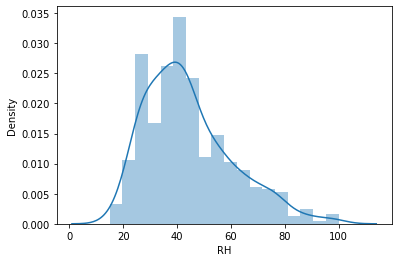

In [46]:
sns.distplot(forest['RH'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

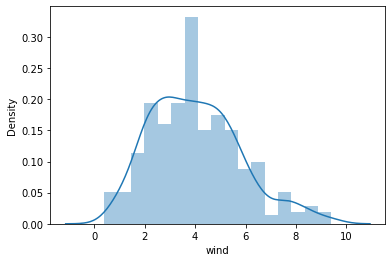

In [47]:
sns.distplot(forest['wind'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

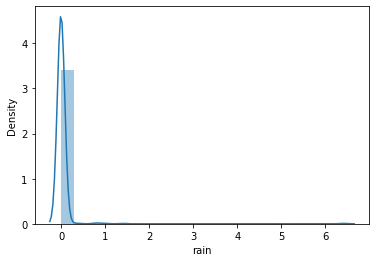

In [48]:
sns.distplot(forest['rain'])

#### Dropping Month and Day column

In [49]:
forest_n = forest.drop(['month','day'],axis=1)

In [50]:
forest_n

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


#### using 1 hot encoding on size_category column

In [51]:
Forest_n = pd.get_dummies(forest , columns = ['size_category'],drop_first = True)

In [52]:
Forest_n

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category_small
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
## Renaming the size_category column

In [54]:
Forest_n = Forest_n.rename(columns= {'size_category_small' : 'size_category'})

In [55]:
## Plotting size_category

<AxesSubplot:xlabel='size_category', ylabel='count'>

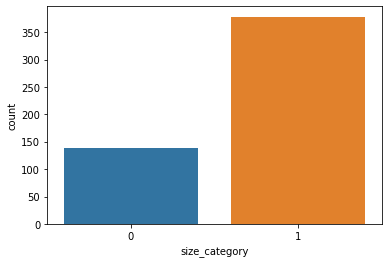

In [56]:
sns.countplot(x= 'size_category', data = Forest_n)

#### Checking Correlation 

In [57]:
corr =forest_n.corr()

#### Plotting HeatMap

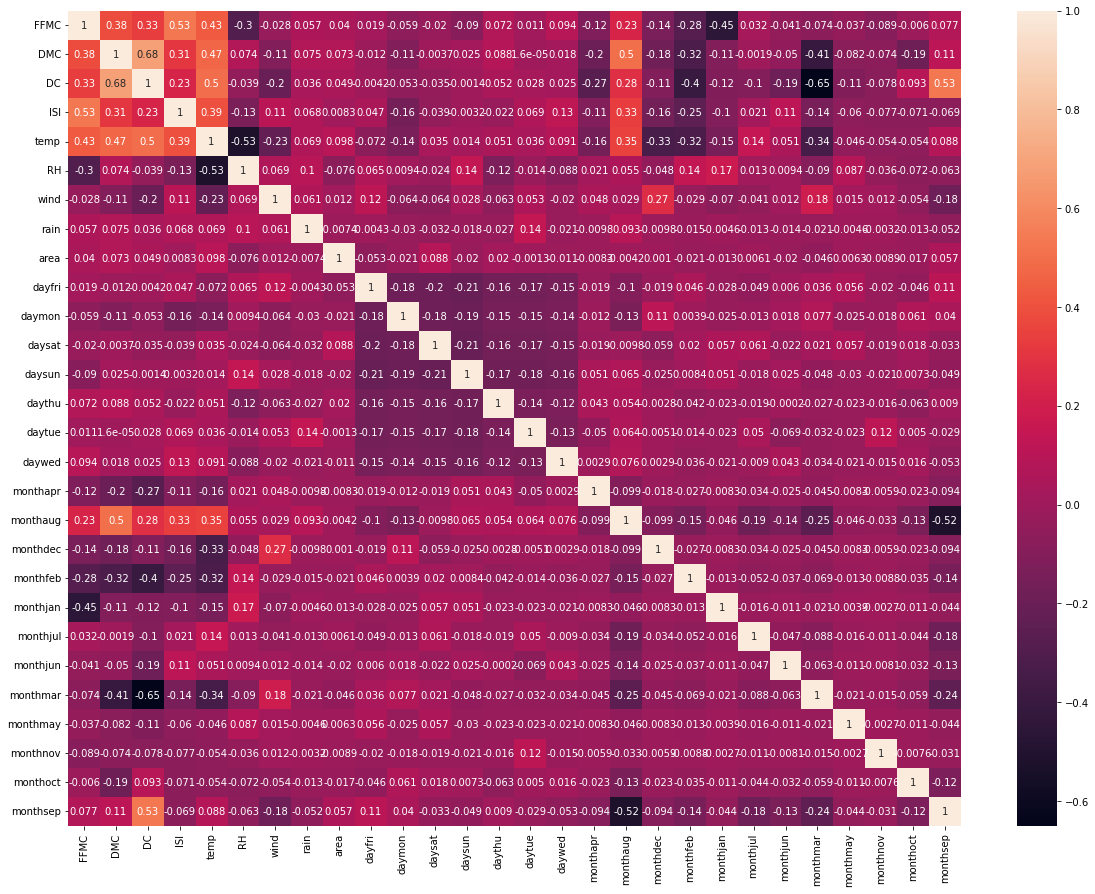

In [58]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.show()

In [122]:
## Pairplot

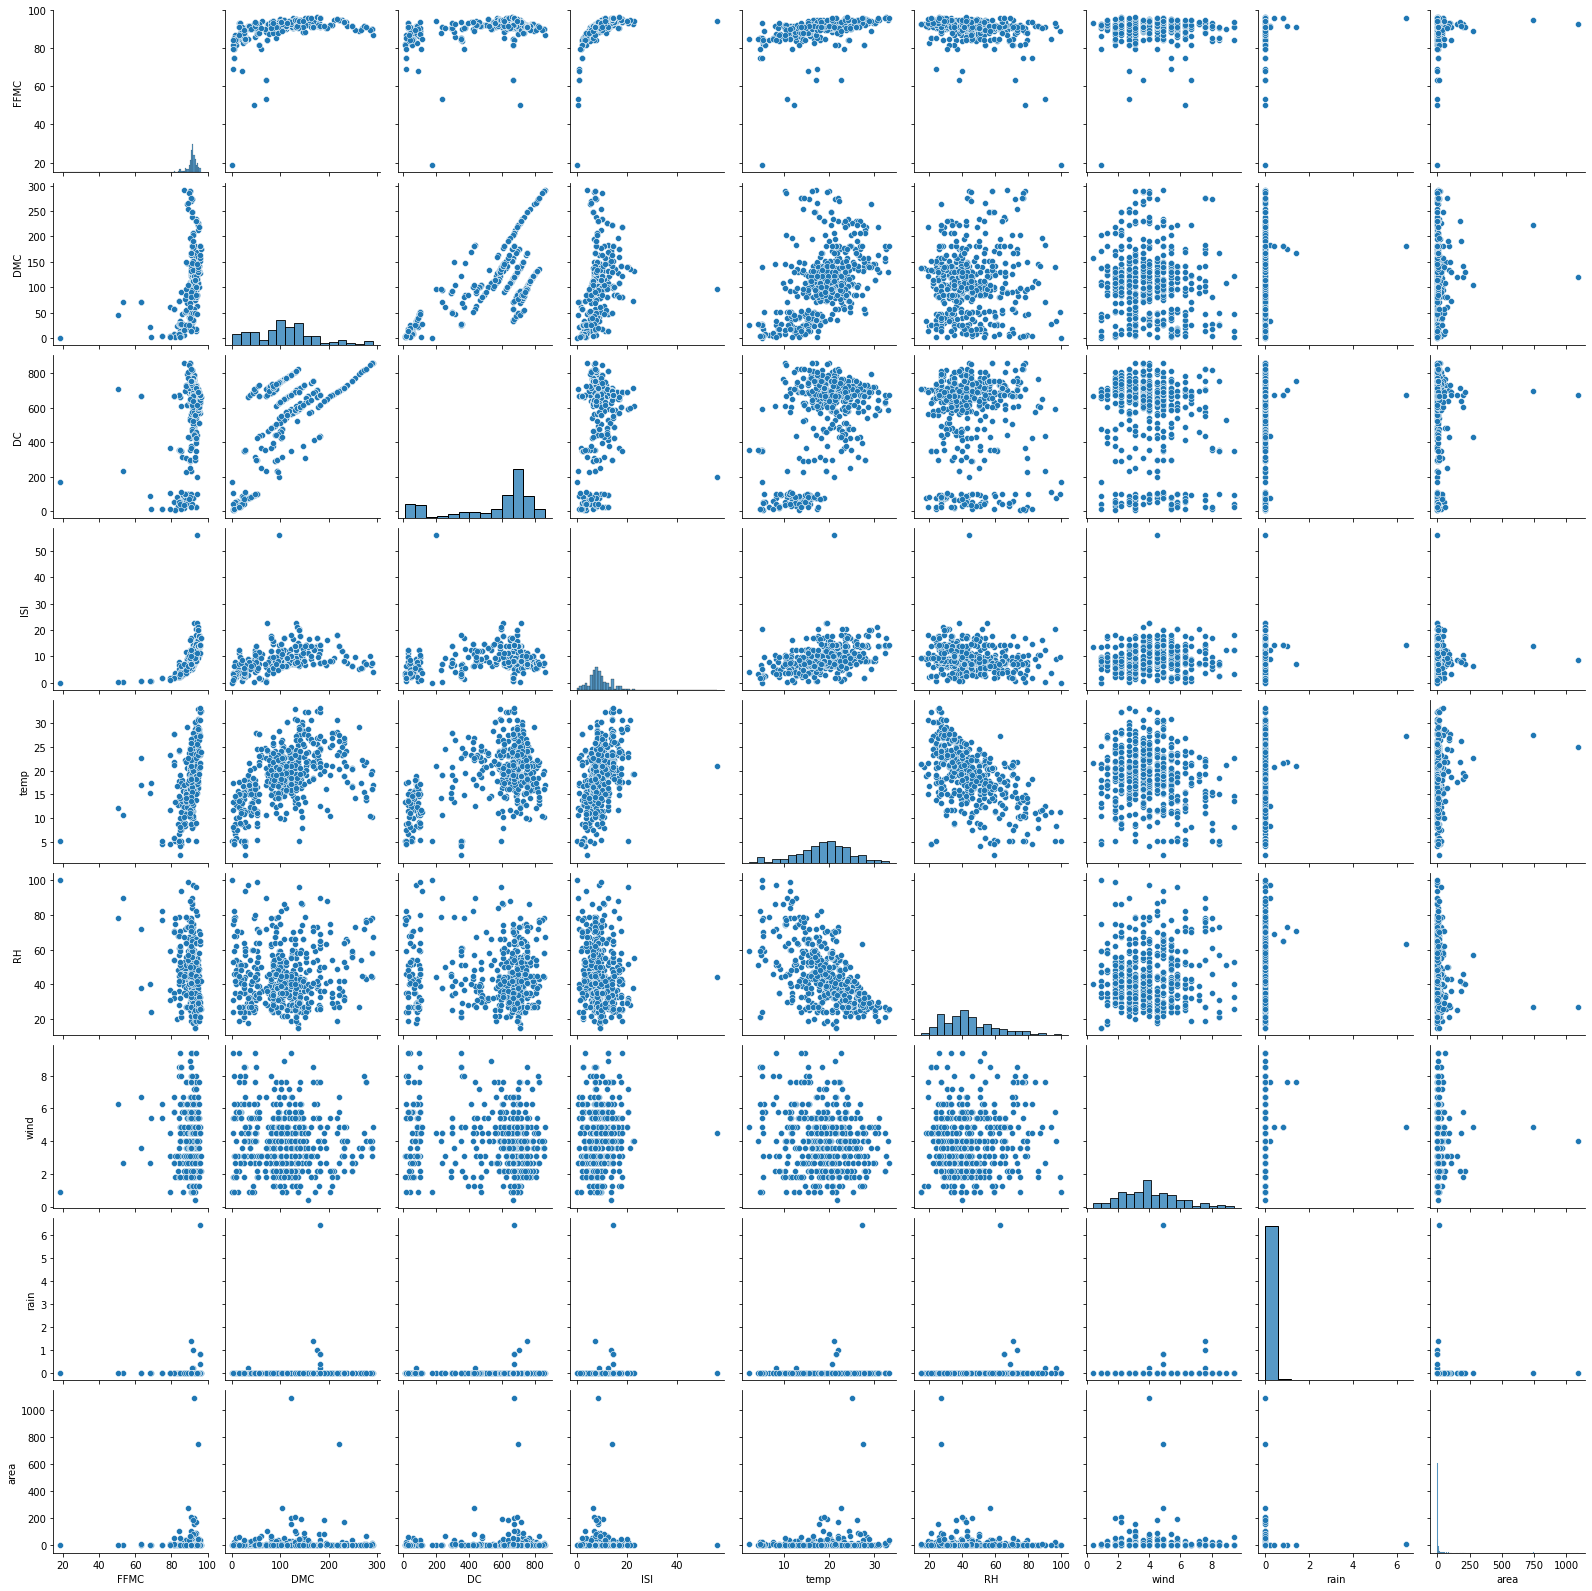

In [124]:
pair_data = pd.concat([forest_n.iloc[:,0:9],forest_n.iloc[:,-1]],axis = 1)
sns.pairplot(pair_data)
plt.show()

In [59]:
Forest_n

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
forest_n = Forest_n.drop(['month','day'],axis=1)

### Model Building

In [61]:
x = forest_n.drop(['size_category'],axis = 1)
y = forest_n[['size_category']]

In [62]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


#### Splitting the data into train, test

In [177]:
pip install -U imbalanced-learn

     -------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dtale 2.7.1 requires scipy==1.7.3; python_version == "3.7", but you have scipy 1.7.1 which is incompatible.

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [64]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

In [65]:
x_train.shape, x_test.shape,

((361, 28), (156, 28))

In [66]:
y_train.shape, y_test.shape

((361, 1), (156, 1))

#### Convert Data into standard scale

In [67]:
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
 1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
 2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
 3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
 4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  91.372665  137.325971  680.945740   9.473142  16.000477  58  5.690184   
 534  87.307221   10.323502   25.368854   7.059981   9.503587  39  6.480038   
 535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
 536  91.810487  169.218024  632.028060  10.420531  20.563220  53  3.168242   
 537  93.914567  165.944421  706.169390  15.226172  20.152591  49  4.182222   
 
      rain       area  dayfri  ...  monthdec  mont

In [68]:
x_train_sm.shape,y_train_sm.shape


((538, 28), (538,))

In [69]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()

#### Convert Data into standard scale

In [70]:
scale = MinMaxScaler()
x_train_scaled = scale.fit_transform(x_train)
x_train_scaled

array([[0.96774194, 0.34683281, 0.53209818, ..., 0.        , 0.        ,
        0.        ],
       [0.95612903, 0.40809969, 0.91527024, ..., 0.        , 0.        ,
        1.        ],
       [0.94709677, 0.52440291, 0.76740618, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96954562, 0.27960713, 0.80122036, ..., 0.        , 0.        ,
        1.        ],
       [0.94336113, 0.58192462, 0.73652119, ..., 0.        , 0.        ,
        0.        ],
       [0.97051055, 0.57059336, 0.82401391, ..., 0.        , 0.        ,
        0.        ]])

In [71]:
x_test_scaled = scale.fit_transform(x_test)
x_test_scaled

array([[0.93251534, 0.57586327, 0.45927711, ..., 0.        , 0.        ,
        0.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ],
       [0.84662577, 0.291594  , 0.8446988 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.82822086, 0.67038716, 0.74614458, ..., 0.        , 0.        ,
        0.        ],
       [0.88650307, 0.416812  , 0.78325301, ..., 0.        , 0.        ,
        1.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ]])

### Model Training

Tuning of Hyperparameter : Batch size and Epoch

In [72]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [213]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_res = gsv.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.602 total time=   5.6s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.602 total time=   3.9s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.370 total time=   3.8s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.729 total time=   4.2s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   9.1s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.213 total time=   5.3s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.713 total time=   5.2s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.731 total time=   5.1s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.850 total time=   5.4s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.000 total time=   5.5s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.824 total time=   9.7s
[CV 2/5] END ..........batch_size=10, epochs=50;,

In [214]:
print(gsv_res.best_params_,gsv_res.best_score_)


{'batch_size': 10, 'epochs': 50} 0.8160609126091003


In [73]:
#Turning Hyperparameter: Learning rate and Dropout rate
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [74]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

In [75]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.213 total time=  11.5s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.694 total time=  10.3s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.815 total time=  10.4s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.271 total time=  10.3s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=  11.0s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.852 total time=  10.7s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.843 total time=  10.4s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.213 total time=  10.7s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.925 total time=  10.5s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.991 total time=  10.6s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.815 total time=   9.9s
[CV 2/5] END dropout_rate=0.0, 

In [76]:
print(gsv_r.best_params_,gsv_r.best_score_)


{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8478020071983338


#### Tuning of Hyperparameter :Activation Function & Kernel Initializer

In [77]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [78]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.815 total time=   9.5s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.741 total time=   9.4s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.843 total time=  10.6s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.860 total time=  10.6s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.963 total time=  11.4s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.806 total time=  10.2s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.741 total time=  10.4s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.806 total time=   9.9s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.860 total time=  11.6s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.869 total time=  11.2s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.778 total time=   6.1s
[CV 2/5] END Activat

In [79]:
print(gsv_result.best_score_,gsv_result.best_params_)

0.8552613258361816 {'Activation_Function': 'tanh', 'init': 'zero'}


#### Tuning of Hyperparameter :Number of Neurons in hidden layer

In [80]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [82]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.880 total time=   3.0s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.787 total time=   2.9s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.870 total time=   2.9s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.897 total time=   4.0s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.972 total time=   3.8s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.861 total time=   3.3s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.824 total time=   2.8s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.852 total time=   2.8s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.879 total time=   3.0s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.963 total time=   3.0s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.861 total time=   2.8s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [83]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.8812391757965088 {'neuron1': 24, 'neuron2': 12}


#### Train a model with optimum values of hyperparameter

In [84]:
# best Parameters
# batch_size = 10
# epochs = 50
# dropout_rate = 0.1
# learning rate = 0.001
# activation_function = tanh
# kernel_initiative = normal
# neuron1 = 8
# neuron2 = 8

In [85]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [86]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(x_train_scaled,y_train)

Epoch 1/50
54/54 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.4833
Epoch 2/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.6673
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6747
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7732
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7565
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.8011
Epoch 7/50
54/54 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.8178
Epoch 8/50
54/54 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8067
Epoch 9/50
54/54 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8216
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8271
Epoch 11/50
54/54 [

In [89]:
y_predict = model.predict(x_train_scaled)

17/17 [==============================] - 0s 970us/step


In [90]:
accuracy_score(y_train,y_predict)


0.9107806691449815

In [91]:
confusion_matrix(y_train,y_predict)

array([[221,  48],
       [  0, 269]], dtype=int64)

In [92]:
print(classification_report(y_train,y_predict))


              precision    recall  f1-score   support

           0       1.00      0.82      0.90       269
           1       0.85      1.00      0.92       269

    accuracy                           0.91       538
   macro avg       0.92      0.91      0.91       538
weighted avg       0.92      0.91      0.91       538



In [93]:
# testing data
y_test_pred = model.predict(x_test_scaled)

5/5 [==============================] - 0s 1ms/step


In [94]:
accuracy_score(y_test,y_test_pred)

0.8461538461538461

In [95]:
confusion_matrix(y_test,y_test_pred)


array([[44,  3],
       [21, 88]], dtype=int64)

In [96]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.68      0.94      0.79        47
           1       0.97      0.81      0.88       109

    accuracy                           0.85       156
   macro avg       0.82      0.87      0.83       156
weighted avg       0.88      0.85      0.85       156

